# Convolutional Neural Network

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  9 15:27:06 2018

@author: guidosidoni

Este archivo sirve para comparar el accuraci de los modelo corridos en el trabajo final de Machine Learning

Future work: probar con algun tipo de regularizacion para eviatr overfiting, 
tambien se puede probar con una ref mas chica o con data augmentation
"""

import os, shutil
from keras import models #to set up the model
from keras import layers #to set up the model
from keras import optimizers #to compile the medel
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
### SPLIT IMAGES into Training, Validation and Testing 

cdw = os.getcwd()

grafitti = cdw + '/311pictures/Grafiti'
trash = cdw + '/311pictures/Trash'

#Directory where I will save the small dataset
base_dir = cdw + '/311pictures/trash_and_grafitti_small/'
if os.path.isdir(base_dir) == False: os.mkdir(base_dir)
#rename images


Copy the images to the corresponding folders

In [19]:
trash

'/Users/guidosidoni/Documents/NEU/2do Semestre/DA 5030 Introduction to Data MiningMachine Learning/FinalProject/Laboratory/Bos311ImageClassification../311pictures/Trash'

In [21]:
#copy images to the corresponding folders
i = 0
for fname in os.listdir(grafitti):
    print(fname)
    src = os.path.join(grafitti, fname)
    dst = os.path.join(base_dir, 'gra_{}.jpg'.format(i))
    shutil.copyfile(src, dst)
    i = i + 1

i = 0
for fname in os.listdir(trash):
    print(fname)
    src = os.path.join(trash, fname)
    dst = os.path.join(base_dir, 'tra_{}.jpg'.format(i))
    shutil.copyfile(src, dst)
    i = i + 1

Pro-Gra-101001947789.jpg
Pro-Gra-101001954093.jpg
Pro-Gra-101001954087.jpg
Pro-Gra-101001945808.jpg
Pro-Gra-101001947979.jpg
Pro-Gra-101001949001.jpg
Pro-Gra-101001758273.jpg
Pub-PWD-101001249589.jpg
Pub-PWD-101001900029.jpg
Pro-Gra-101001952582.jpg
Pro-Gra-101001954124.jpg
Pro-Gra-101001954118.jpg
Pub-PWD-101001415287.jpg
Pro-Gra-101001950815.jpg
Pro-Gra-101001949377.jpg
Pro-Gra-101001222338.jpg
Pro-Gra-101001198608.jpg
Pro-Gra-101001955004.jpg
Pub-PWD-101001953882.jpg
Pub-PWD-101001850421.jpg
Pro-Gra-101001636622.jpg
Pub-PWD-101001805839.jpg
Pro-Gra-101001946521.jpg
Pro-Gra-101001945996.jpg
Pro-Gra-101001952583.jpg
Pro-Gra-101001951883.jpg
Pro-Gra-101001954045.jpg
Pro-Gra-101001340635.jpg
Pub-PWD-101001954082.jpg
Pro-Gra-101001609559.jpg
Pro-Gra-101001954253.jpg
Pub-PWD-101001172834.jpg
Pub-PWD-101001955363.jpg
Pub-PWD-101001502868.jpg
Pro-Gra-101001954286.jpg
Pub-PWD-101001955361.jpg
Pro-Gra-101001950792.jpg
Pro-Gra-101001346078.jpg
Pro-Gra-101001752205.jpg
Pro-Gra-101001954251.jpg


Pro-Gra-101001625143.jpg
Pro-Gra-101001949899.jpg
Pro-Gra-101001949655.jpg
Pub-PWD-101001772779.jpg
Pro-Gra-101001953143.jpg
Pro-Gra-101001953631.jpg
Pub-PWD-101001947330.jpg
Pro-Gra-101001951797.jpg
Pub-PWD-101001955708.jpg
Pub-PWD-101001947293.jpg
Pub-PWD-101001607537.jpg
Pro-Gra-101001349656.jpg
Pub-PWD-101001952891.jpg
Pro-Gra-101001948629.jpg
Pub-PWD-101001702842.jpg
Pro-Gra-101001955122.jpg
Pub-PWD-101001249691.jpg
Pub-PWD-101001249609.jpg
Pub-PWD-101001887588.jpg
Pub-PWD-101001882396.jpg
Pro-Gra-101001951323.jpg
Pro-Gra-101001951445.jpg
Pub-PWD-101001953901.jpg
Pub-PWD-101001807149.jpg
Pub-PWD-101001949226.jpg
Pro-Gra-101001224344.jpg
Pro-Gra-101001954071.jpg
Pub-PWD-101001955814.jpg
Pro-Gra-101001953871.jpg
Pro-Gra-101001954878.jpg
Pub-PWD-101001949346.jpg
Pro-Gra-101001954105.jpg
Pub-PWD-101001950830.jpg
Pub-PWD-101001951284.jpg
Pro-Gra-101001946529.jpg
Pub-PWD-101001249543.jpg
Pub-PWD-101001851723.jpg
Pub-PWD-101001697221.jpg
Pro-Gra-101001952979.jpg
Pro-Gra-101001237099.jpg


Pub-Imp-101001943611.jpg
Pub-CE -101001930418.jpg
Pub-CE -101001604398.jpg
Pub-CE -101001424796.jpg
Pub-Imp-101001939601.jpg
Pub-CE -101001885523.jpg
Pub-Imp-101001727230.jpg
Pub-Imp-101001750084.jpg
Pub-Imp-101001923498.jpg
Pub-CE -101001805082.jpg
Pub-Imp-101001892680.jpg
Pub-CE -101001813804.jpg
Pub-CE -101001943799.jpg
Pub-Imp-101001946406.jpg
Pub-CE -101001412413.jpg
Pub-CE -101001902289.jpg
Pub-CE -101001411898.jpg
Pub-Emp-101001177646.jpg
Pub-Imp-101001725779.jpg
Pub-Emp-101001426601.jpg
Pub-CE -101001811236.jpg
Pub-CE -101001902538.jpg
Pub-CE -101001661322.jpg
Pub-Imp-101001764297.jpg
Pub-Emp-101001794208.jpg
Pub-CE -101001853206.jpg
Pub-Imp-101001903173.jpg
Pub-Emp-101001328847.jpg
Pub-Imp-101001860403.jpg
Pub-CE -101001899447.jpg
Pub-Imp-101001794776.jpg
Pub-Emp-101001702322.jpg
Pub-Emp-101001801554.jpg
Pub-CE -101001693598.jpg
Pub-CE -101001400823.jpg
Pub-CE -101001896238.jpg
Pub-CE -101001925019.jpg
Pub-CE -101001930416.jpg
Pub-CE -101001798815.jpg
Pub-Imp-101001883375.jpg


Dividing the images into Training, Validation and Training

In [17]:
#directory for the training, validation and test split
train_dir = os.path.join(base_dir, 'train')
if os.path.isdir(train_dir) == False: os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if os.path.isdir(validation_dir) == False: os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if os.path.isdir(test_dir) == False: os.mkdir(test_dir)
    

#directory with training trash pictures 
train_trash_dir = os.path.join(train_dir, 'trash')
if os.path.isdir(train_trash_dir) == False: os.mkdir(train_trash_dir)

#directory with training grafitti pictures 
train_gra_dir = os.path.join(train_dir, 'grafitti')
if os.path.isdir(train_gra_dir) == False: os.mkdir(train_gra_dir)

#directory with validation trash pictures 
validation_trash_dir = os.path.join(validation_dir, 'trash')
if os.path.isdir(validation_trash_dir) == False: os.mkdir(validation_trash_dir)

#directory with validation grafitti pictures 
validation_gra_dir = os.path.join(validation_dir, 'grafitii')
if os.path.isdir(validation_gra_dir) == False: os.mkdir(validation_gra_dir)

#directory with test trash pictures 
test_trash_dir = os.path.join(test_dir, 'trash')
if os.path.isdir(test_trash_dir) == False: os.mkdir(test_trash_dir)

#directory with test grafitti pictures 
test_gra_dir = os.path.join(test_dir, 'grafitti')
if os.path.isdir(test_gra_dir) == False: os.mkdir(test_gra_dir)

#COPY IMAGES TO THE CORRESPONDING DIRECTORIES
original_dataset_dir = base_dir


In [22]:
#Copies the first 1000 trash images to train_trash_dir
fnames = ['tra_{}.jpg'.format(i) for i in range(366)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_trash_dir, fname)
    shutil.copyfile(src, dst)
    
#copy  the next 500 trash images to validation_trash_dir
fnames = ['tra_{}.jpg'.format(i) for i in range(366, 550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_trash_dir, fname)
    shutil.copyfile(src, dst)
    

#Copies the first 1000 grafitti images to train_grafitti_dir
fnames = ['gra_{}.jpg'.format(i) for i in range(366)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_gra_dir, fname)
    shutil.copyfile(src, dst)
    
#copy  the next 500 grafitti images to validation_grafitti_dir
fnames = ['gra_{}.jpg'.format(i) for i in range(366, 550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_gra_dir, fname)
    shutil.copyfile(src, dst)


## Seting the CNN Model

In [23]:
#MODELS SET-UP

model = models.Sequential()
model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#MODEL OPTIMIZATION

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])






In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')


#FIT MODEL --> RUN
history = model.fit_generator(
        train_generator,
        steps_per_epoch=18,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=6)




Found 732 images belonging to 2 classes.
Found 368 images belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - 26s 1s/step - loss: 0.6856 - acc: 0.5500 - val_loss: 0.6935 - val_acc: 0.4417
Epoch 2/20
18/18 [==============================] - 22s 1s/step - loss: 0.6750 - acc: 0.5782 - val_loss: 0.6861 - val_acc: 0.4667
Epoch 3/20
18/18 [==============================] - 25s 1s/step - loss: 0.6449 - acc: 0.6250 - val_loss: 0.6214 - val_acc: 0.7167
Epoch 4/20
18/18 [==============================] - 20s 1s/step - loss: 0.6224 - acc: 0.6676 - val_loss: 0.6425 - val_acc: 0.6417
Epoch 5/20
18/18 [==============================] - 25s 1s/step - loss: 0.6239 - acc: 0.6667 - val_loss: 0.5690 - val_acc: 0.7750
Epoch 6/20
18/18 [==============================] - 22s 1s/step - loss: 0.5740 - acc: 0.7055 - val_loss: 0.6507 - val_acc: 0.6250
Epoch 7/20
18/18 [==============================] - 26s 1s/step - loss: 0.5640 - acc: 0.7472 - val_loss: 0.5373 - val_acc: 0.7917
Epoch 8/

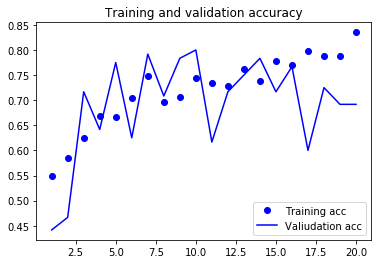

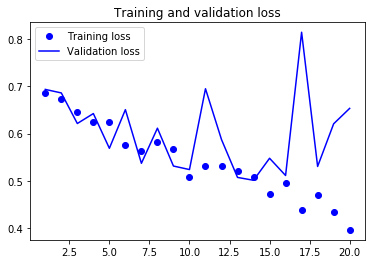

In [25]:
#PLOTING THE OUTPUT
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Valiudation acc')     
plt.title('Training and validation accuracy')   
plt.legend() 
    
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()